In [4]:
#importing packages for data manuplation
import sys
import os
import scipy
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt
sys.path.insert(0,'../scripts_/')
from HypothesisPlot import HypothesisPlot
from DistributionPlots import DistributionPlots
#for pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [53]:
#load data
sys.path.append(os.path.abspath(os.path.join('data')))

### Data Preparation

In [6]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/AdSmartABdata.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [7]:
df.shape

(8077, 9)

In [8]:
def check_data(df):
        print ("People that didn't fill yes/no: ", df.loc[((df["yes"]== 0) & (df["no"]==0))].shape[0])
        clean_df = df.loc[~((df["yes"]== 0) & (df["no"]==0))]
        print("People answered either yes/no: ", clean_df.shape[0])
        return df

In [44]:
check_data(df)

People that didn't fill yes/no:  6834
People answered either yes/no:  1243


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [45]:
#categorical vs. numerical

def catagory(df):
    numerical_column = df.select_dtypes(exclude="object").columns.tolist()
    categorical_column = df.select_dtypes(include="object").columns.tolist()
    print("Numerical Columns:", numerical_column)
    print("****************")
    print("Categorical Columns:", categorical_column)

In [54]:
#general info
pipe = Pipeline(steps=[ ("check_data", FunctionTransformer(check_data)),
                        ("category", FunctionTransformer(catagory))])
pipe.fit_transform(df)

People that didn't fill yes/no:  6834
People answered either yes/no:  1243
Numerical Columns: ['hour', 'platform_os', 'yes', 'no']
****************
Categorical Columns: ['auction_id', 'experiment', 'date', 'device_make', 'browser']


In [55]:
#check duplicate id
if(df.nunique()['auction_id']==8077):
    print("no repeated impression id")

no repeated impression id


In [56]:
#group users
def groups(df):
    aggregat_contorl = df.groupby('experiment').agg({'auction_id': 'count'})['auction_id']['control']
    aggregat_exposed  = df.groupby('experiment').agg({'auction_id': 'count'})['auction_id']['exposed']
    print(f"users that belong to control group are {aggregat_contorl}")
    print(f"users that belong to exposed group are {aggregat_exposed}")
    return df

In [57]:
groups(df)

users that belong to control group are 4071
users that belong to exposed group are 4006


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


* if both section of yes and no is 0, then the users didn't answered
* let us filter out those who answered either yes or no

In [58]:
#answered yes or no
def answered_rows(df):
    answered = df.query('yes==1 or no==1')
    print(f"There are {answered.shape[0]} rows and {answered.shape[1]} columns with users answering yes or no")

In [49]:
answered_rows(df)

There are 1243 rows and 9 columns with users answering yes or no


* plots of control and exposed group users

In [24]:
#Visualizing experiment using barplot
def plot_experiment(df):    
    sns.set()
    df['experiment'].value_counts().plot(kind='bar')
    plt.title('Bar plot',fontsize=15)
    plt.xlabel('experiment',fontsize=12),plt.ylabel('count',fontsize=12)
    plt.show()


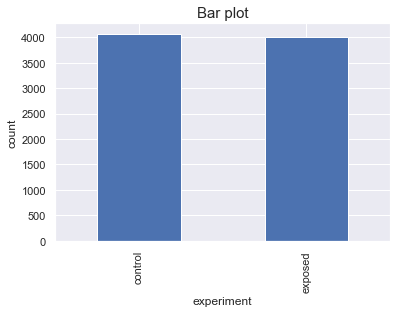

In [59]:
pipe = Pipeline(steps=[("plot_experiment", FunctionTransformer(plot_experiment))])
pipe.fit_transform(df)

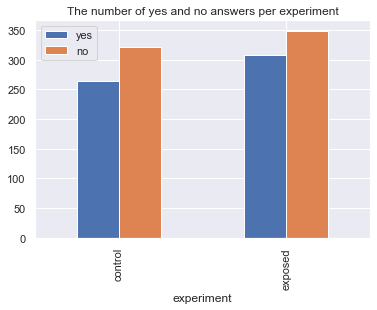

Number of users who repsonded positively in the controled group are 264
while 322 who responded negatively
Number of users who repsonded positively in the exposed group are 308
while 349 who responded negatively


In [65]:
# Identifying the exposed group and control group

exposed_df = df[df['experiment'] == 'exposed']

control_df = df[df['experiment'] == 'control']


def exp_cont(df):
    aggr_response = df.groupby('experiment').agg({'yes': 'sum', 'no': 'sum'}).plot(kind='bar')
    plt.title("The number of yes and no answers per experiment")
    plt.show()

    #get users who repsonded positively in the exposed group
    control_df_pos_response = control_df[control_df['yes'] == 1]
    control_df_neg_response = control_df[control_df['no'] == 1]
    #get users who repsonded positively in the exposed group
    exposed_pos_response = exposed_df[exposed_df['yes'] == 1]
    exposed_df_neg_response = exposed_df[exposed_df['no'] == 1]

    print(f"Number of users who repsonded positively in the controled group are {control_df_pos_response.shape[0]}")
    print(f"while {control_df_neg_response.shape[0]} who responded negatively")


    print(f"Number of users who repsonded positively in the exposed group are {exposed_pos_response.shape[0]}")
    print(f"while {exposed_df_neg_response.shape[0]} who responded negatively")
    
exp_cont(df)

In [67]:
 #All users who answered yes
yes_df = control_df[control_df['yes'] == 1].append(exposed_df[exposed_df['yes'] == 1])
yes_df = yes_df.drop(['yes','no'], axis = 1)
yes_df['response'] = 1
#All users who answered no
no_df = control_df[control_df['no'] == 1].append(exposed_df[exposed_df['no'] == 1])
no_df = no_df.drop(['yes','no'], axis = 1)
no_df['response'] = 0
#Final Combined dataframe will be
combined_df = yes_df.append(no_df)
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
combined_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,9ea96c35-6b58-477a-bcca-392be377e13b,control,2020-07-10,3,VFD 820,6,Chrome Mobile WebView,0
1,f6b7f0e9-7bb1-4c46-ac29-359e872de73d,exposed,2020-07-09,17,Samsung SM-G975F,6,Chrome Mobile WebView,1
2,da8b2153-3118-4c2a-bee1-ead1f31cb6a7,exposed,2020-07-05,18,Samsung SM-J530F,6,Samsung Internet,1
3,b3ee40de-5ae2-42e4-a01c-7c4020aece1b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
4,e245e216-96e1-4ef9-8be7-7b3b4a9ee2a6,exposed,2020-07-09,10,Samsung SM-G955F,6,Samsung Internet,1


>All user that responded 'yes' are assigned to 1<br>
>All user that responded 'no' are assigned to 0<br>
>The results then assigned to response column for better analysis

#### Grouping the result by browser

In [ ]:
browser_group_df = combined_df.groupby('browser').agg(
    {'experiment': 'count', 'hour': 'sum', 'response': 'sum'})
browser_group_df

>Highest number of response were recorded on Chrome mobile

* PLOT OF USED BROWSERS

In [ ]:
plt.figure(figsize=(9,7))
ax= sns.countplot(x ='browser', data = df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
ax.set_xlabel('Browser', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Used Browsers', fontsize=15, fontweight='bold')

#### Grouping the result by date

In [ ]:
date_group_df = combined_df.groupby('date').agg({'experiment':'count','hour':'sum','response':'sum'})
date_group_df

>147 responeses were recorded on date 2020-07-03<br>


* PLOT FOR DATE

In [ ]:
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
    
plot_count(answered, 'date')

* Most of the data was collected on the first date

#### Grouping the result by device

In [ ]:
date_group_df = combined_df.groupby('device_make').agg(
    {'experiment': 'count', 'hour': 'sum', 'response': 'sum'})
date_group_df.head(15)

>Highest number of response were recorded by different device

In [ ]:
top_10 = df['device_make'].value_counts().nlargest(10)
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(top_10.values, labels=top_10.index, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title('Pie plot of most popular smart phones', fontsize=15, fontweight='bold')
plt.show()

* From the graph we can see that the version of smartphones used are not known

* CORRELATION ANALYSIS

In [ ]:
plt.figure(figsize=(8, 7))
corr = df.corr()
sns.heatmap(corr)
plt.title('correlation', fontsize=15, fontweight='bold')
plt.show()

* we can see that the controlled group converted more than the exposed group

* the dash lines represents the mean conversion rates for the control and exposed group